In [1]:

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load one fMRI run
fmri_img = nib.load('gdrive_ds000171/sub-control01/func/sub-control01_task-music_run-1_bold.nii.gz')
fmri_img_mc = nib.load('sub_control01_preprocessed/func/sub-control01_task-music_run-3_bold_smoothed.nii.gz')
# Visualize a few slices from the fMRI
data = fmri_img.get_fdata()
data_mc= fmri_img_mc.get_fdata()






True


In [3]:
import os
from tqdm import tqdm
from fsl.wrappers import mcflirt, fslmaths, fslmerge, epi_reg, bet, flirt

# Set directories
data_dir = 'gdrive_ds000171/sub-control01'  
output_dir_func = 'sub_control01_preprocessed2/func'
output_dir_anat = 'sub_control01_preprocessed2/anat'
subject_id = 'sub-control01'
mni_template = '/usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'

# List of runs
runs = [
    'sub-control01_task-music_run-1_bold',
    'sub-control01_task-music_run-2_bold',
    'sub-control01_task-music_run-3_bold'
]

# Create output directory if it doesn't exist
os.makedirs(output_dir_func, exist_ok=True)


# ANAT steps:
# BET
anat_file = os.path.join(data_dir, 'anat', f'{subject_id}_T1w.nii.gz')
bet_output_path = os.path.join(output_dir_anat, f'{subject_id}_T1w_bet.nii.gz')
if not os.path.exists(bet_output_path):
    print("Running skull stripping...")
    bet(input=anat_file, output=bet_output_path)
else:
    print("Skull stripped files already exist.")

Running skull stripping...

Error: input image gdrive_ds000171/sub-control01/anat/sub-control01_T1w not valid



RuntimeError: /Users/loufourneaux/fsl/bin/bet returned non-zero exit code: 1

In [2]:
import nibabel as nib

try:
    img = nib.load(anat_file)
    print("File loaded successfully.")
except Exception as e:
    print("File could not be loaded:", e)

File loaded successfully.


In [15]:
import nibabel as nib

anat_file_path = 'gdrive_ds000171/sub-control01/anat/sub-control01_T1w.nii.gz'
try:
    img = nib.load(anat_file_path)
    print(f"Image loaded successfully: {anat_file_path}")
except Exception as e:
    print(f"Error loading image: {e}")

Image loaded successfully: gdrive_ds000171/sub-control01/anat/sub-control01_T1w.nii.gz


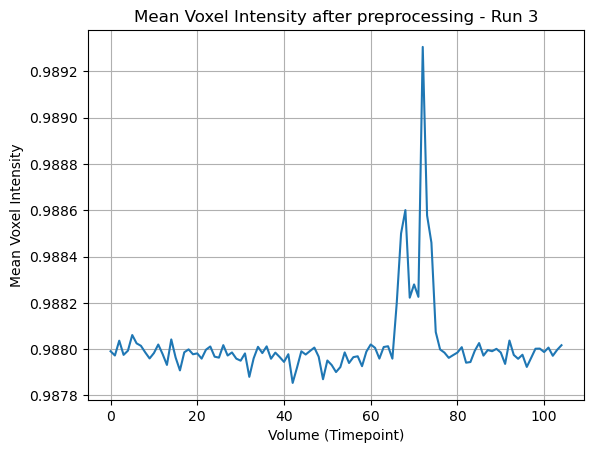

In [29]:
# Compute the mean voxel intensity for each volume (timepoint)
mean_intensity_per_volume = data_mc.mean(axis=(0, 1, 2))

# Plot the mean voxel intensity across time

plt.plot(mean_intensity_per_volume)
plt.title('Mean Voxel Intensity after preprocessing - Run 3')
plt.xlabel('Volume (Timepoint)')
plt.ylabel('Mean Voxel Intensity')
plt.grid(True)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(data[:, :, data.shape[2]//2, 0], cmap='gray')
axes[1].imshow(data[:, :, data.shape[2]//2, 50], cmap='gray')
axes[2].imshow(data[:, :, data.shape[2]//2, 100], cmap='gray')
plt.show()

# Visualize the voxel intensity distribution (before skull stripping)
plt.hist(data.flatten(), bins=100)
plt.title('Voxel Intensity Histogram')
plt.show()


In [ ]:
# Example of motion parameter plotting
motion_params = np.loadtxt('path_to_motion_params.txt')  # assuming you have motion correction outputs
plt.plot(motion_params)
plt.title('Motion Correction Parameters')
plt.legend(['X-translation', 'Y-translation', 'Z-translation', 'X-rotation', 'Y-rotation', 'Z-rotation'])
plt.show()

     Rotation X  Rotation Y  Rotation Z  Translation X  Translation Y  \
0     -0.002976    0.003105    0.000012      -0.060360      -0.512267   
1     -0.003423    0.003047    0.000012      -0.071306      -0.496071   
2     -0.003170    0.003047    0.000012      -0.058445      -0.471575   
3     -0.003156    0.003254   -0.000242      -0.071041      -0.482740   
4     -0.002804    0.003047   -0.000326      -0.071119      -0.476139   
..          ...         ...         ...            ...            ...   
310    0.009034   -0.000077   -0.001910      -0.094490       0.392878   
311    0.009127   -0.000207   -0.002110      -0.087976       0.373841   
312    0.009127   -0.000362   -0.001910      -0.094418       0.394838   
313    0.009039   -0.000422   -0.001910      -0.094399       0.364491   
314    0.009109   -0.000429   -0.002444      -0.127227       0.359385   

     Translation Z  
0        -0.473430  
1        -0.459169  
2        -0.446123  
3        -0.463436  
4        -0.494133

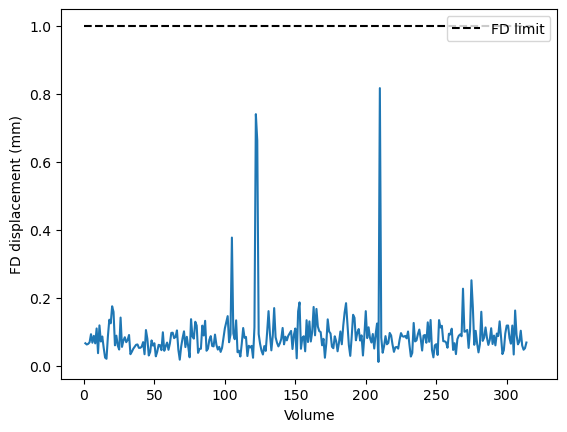

In [13]:
from helper import *
import numpy as np
import matplotlib.pyplot as plt

mots= load_mot_params_fsl_6_dof('sub_control01_preprocessed2/func/concatenated_standardized_mc.nii.gz.par')
print(mots)
fd=compute_FD_power(mots).to_numpy()
threshold= 1

plt.plot(list(range(1,fd.size+1)),fd)
plt.xlabel('Volume')
plt.ylabel('FD displacement (mm)')
plt.hlines(threshold, 0,320,colors='black', linestyles='dashed', label= 'FD limit')
plt.legend()
plt.show()